Clone the repository and download the trained models

In [1]:
!git clone https://github.com/hugalgo/bubble-detection.git
%cd bubble-detection/
!gdown --id 1PAHYQWSL9rm1SADaMTsK3AmjjOceMRXn -O models/FRCNN/latest.pth

Cloning into 'bubble-detection'...
remote: Enumerating objects: 10812, done.
remote: Counting objects: 100% (10812/10812), done.
remote: Compressing objects: 100% (3613/3613), done.
remote: Total 10812 (delta 7164), reused 10782 (delta 7134), pack-reused 0
Receiving objects: 100% (10812/10812), 12.73 MiB | 15.48 MiB/s, done.
Resolving deltas: 100% (7164/7164), done.
/content/bubble-detection
Downloading...
From: https://drive.google.com/uc?id=1PAHYQWSL9rm1SADaMTsK3AmjjOceMRXn
To: /content/bubble-detection/models/FRCNN/latest.pth
333MB [00:01, 220MB/s]


Install mmdetection that allow us to train a faster RCNN among others

In [2]:
%cd mmdetection/
!sh install.sh
%cd ..

/content/bubble-detection/mmdetection
     |████████████████████████████████| 20.0MB 1.4MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.4
    Uninstalling numpy-1.18.4:
      Successfully uninstalled numpy-1.18.4
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-w8580pu0
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-w8580pu0
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=267018 sha256=cda68358257d48f257fdab51b625e6c78f7b58b35efae6311dc3b427fe3d6df4
  Stored in directory: /tmp/pip-ephem-wheel-cache-80je1yqe/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
Created temporary directory: /tmp/pip-ephem-wh

Inference over the test images in: "data/test_inference"

To test new images, change the images in this directory

Using TensorFlow backend.


/content/bubble-detection/mmdetection
/content/bubble-detection


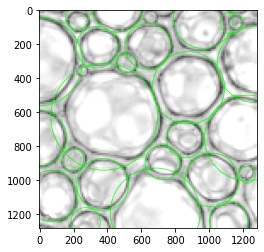

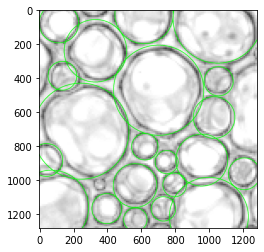

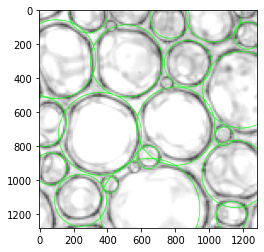

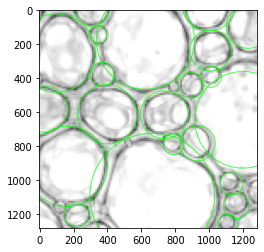

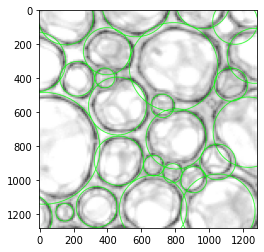

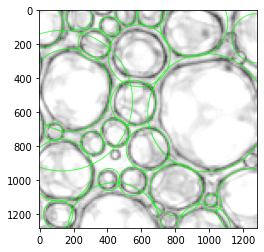

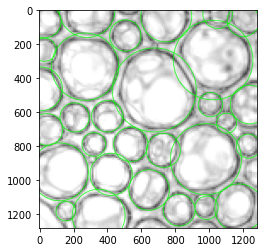

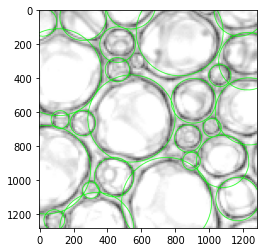

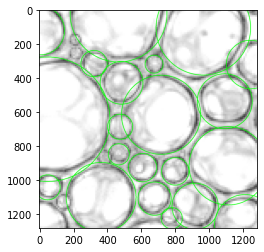

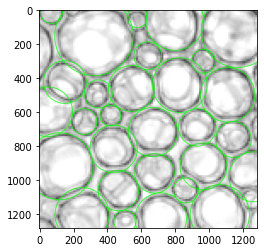

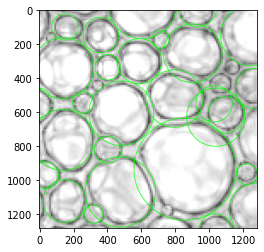

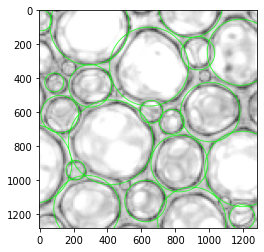

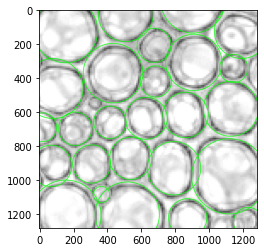

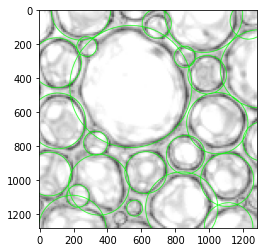

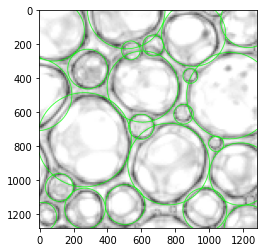

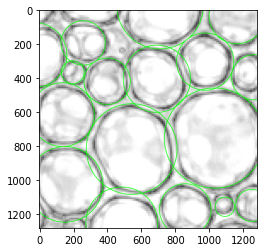

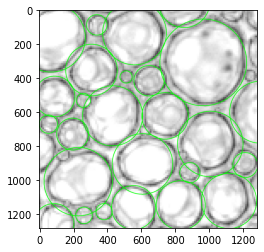

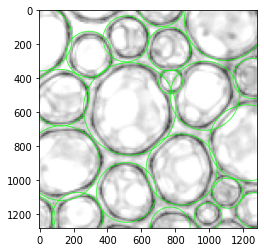

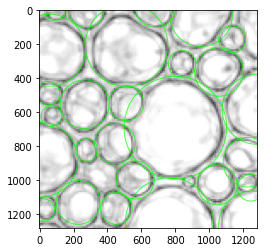

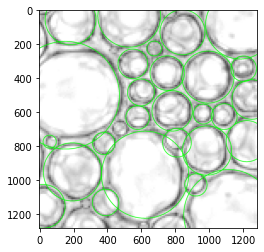

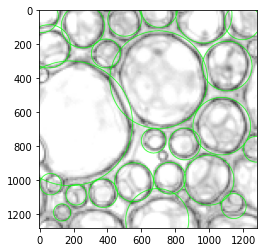

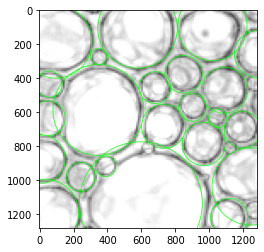

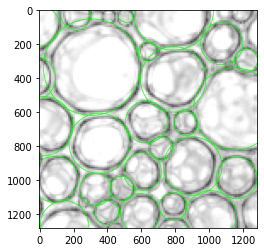

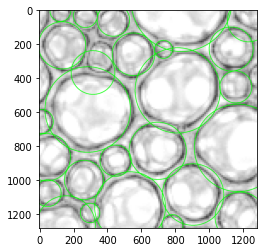

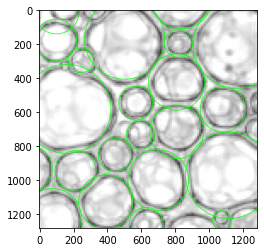

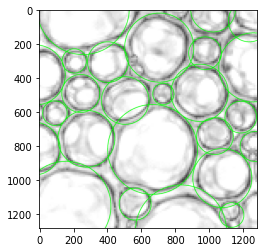

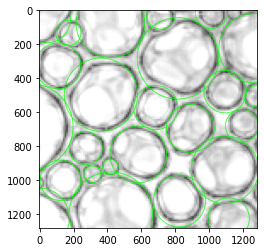

In [3]:
import scripts.roipooling as roi
import matplotlib.image as mpimg
import numpy as np
from scipy import interpolate as inpo
import scripts.qbubble as qb
import os
from keras.models import load_model

%cd mmdetection/
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
%cd ..

config_file = 'mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco-bubble.py'
checkpoint_file = 'models/FRCNN/latest.pth'

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')

#predict using NN
modelmx = load_model('models/MixedCNN/best(1).h5')

arr = os.listdir(r'data/test_inference')
for fi in arr:
    if(('png' in fi)):
        # test a single image and show the results
        img = 'data/test_inference/' + fi  
        result = inference_detector(model, img)
        #RPN
        rois, boxes = roi.obtainROI(img,result)
        #Mixed CNN
        Yp =  modelmx.predict([boxes,rois])
        n_rois = len(Yp)
        #printing the results
        img = mpimg.imread(img)[: ,: ,0]
        v0 = []
        ii=0
        for ii in range(n_rois):
          v0.append(np.array([Yp[ii][0], Yp[ii][1],Yp[ii][2]]))
        qb.qbubblePlot(v0, img, s = 10, t = 3)

